In [ ]:
import numpy as np
import  matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd 'drive/MyDrive/data'

/content/drive/MyDrive/data


In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
print('Out of 100%, nearly {}% belongs to positive class'. format(round(sum(
    data.urban areas/len(data.urban areas)*100
))))

SyntaxError: ignored

In [ ]:
Skf = StratifiedKFold(n_splits=3)

In [ ]:
# CONSTANTS & IMPORTS
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import cv2
import seaborn as sns;sns.set()

IMAGE_SIZE = (2866, 2633, 3)
NUM_OF_DAYS = 23
CLASSES = ["urban areas", "other built-up surfaces", "forests", 
           "sparse vegetation", "rocks and bare soil", "grassland", 
           "sugarcane crops", "other crops", "water"]
FEATURES = [
    "ultra blue","blue","green","red","NIR","SWIR1","SWIR2","NDVI","NDWI","BI"
]

NUM_OF_CLASSES = len(CLASSES)
NUM_OF_FEATURES = len(FEATURES)
NUM_OF_PIXELS = 81714

In [ ]:
# DATA LOADING
data = pd.read_csv('train/training.txt', header=None)
coord = pd.read_csv('train/coord_training.txt', header=None)
classes_val = pd.read_csv('train/training_class.txt', header=None)

data_test = pd.read_csv('test/test.txt', header=None)
coord_test = pd.read_csv("test/coord_test.txt", header=None)
classes_val_test = pd.read_csv("test/test_class.txt", header=None)
y_test = classes_val_test.to_numpy()

In [ ]:
img = [np.zeros(IMAGE_SIZE).astype(np.uint8) for _ in range(NUM_OF_DAYS)]
def row_to_img(row):
    
    idx = row.name
    
    coord_row = coord.iloc[idx, :]

    for i in range(23):
        b = row[i*10+1]
        g = row[i*10+2]
        r = row[i*10+3]
        
        #b = 255
        #g = 255
        #r = 255
        
        if (r > 255):
            r = 255
        if (b > 255):
            b = 255
        if (g > 255):
            g = 255
        
        img[i][coord_row[0], coord_row[1], :] = [r,g,b]
        
tqdm.pandas()
data.progress_apply(row_to_img, axis=1)
print("Images updated")

100%|██████████| 81714/81714 [01:08<00:00, 1188.70it/s]

Images updated


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


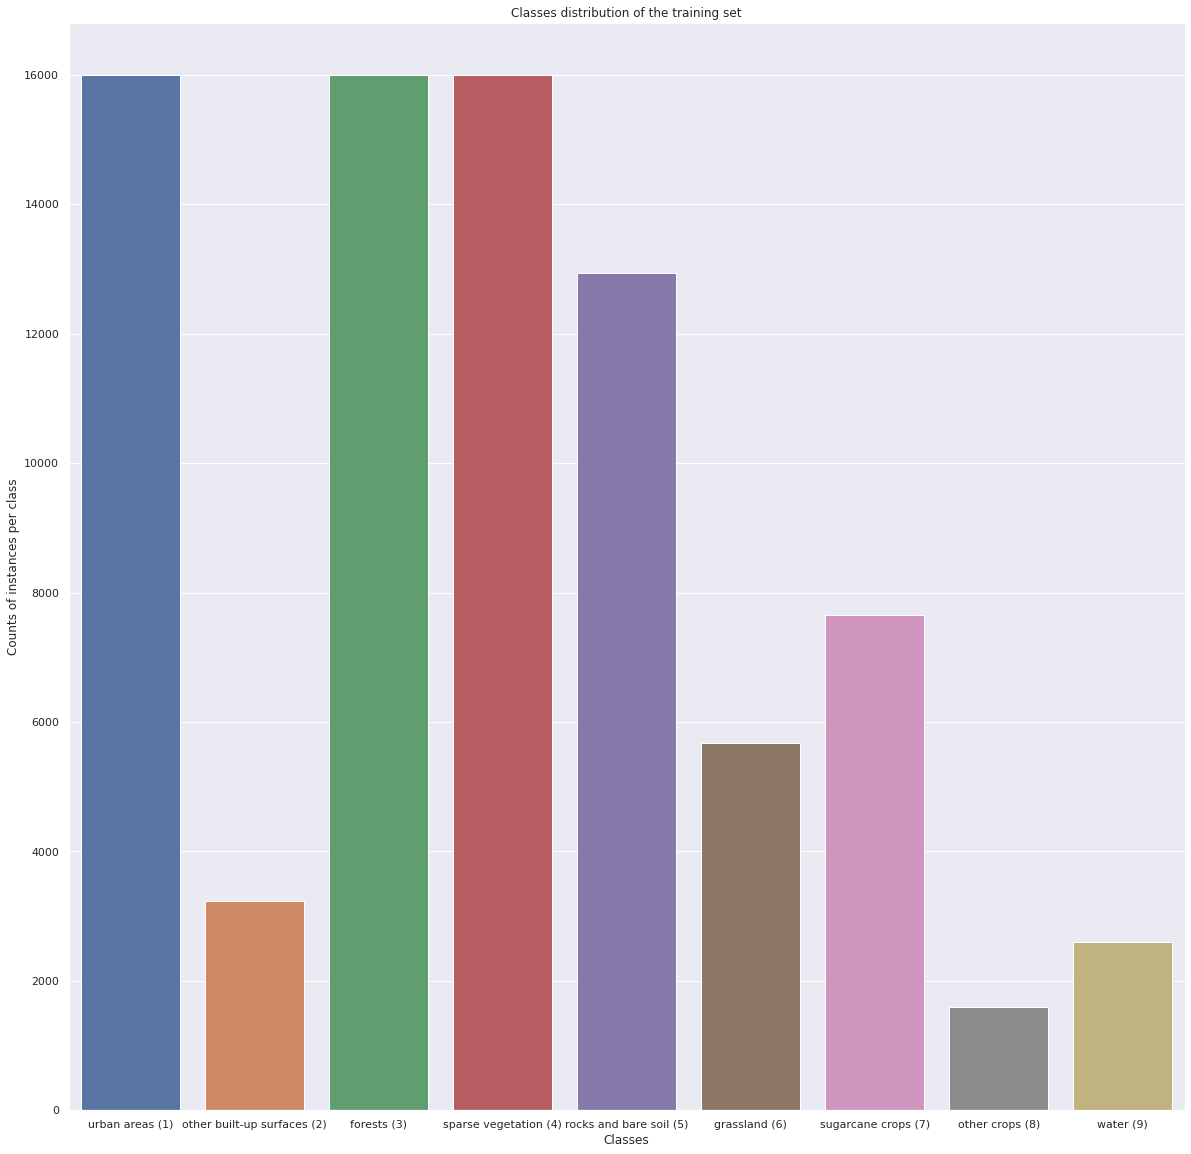

In [ ]:
val_count = classes_val.iloc[:,0].value_counts().sort_index()
x, y = val_count.keys(), val_count.values
plt.figure(figsize = (20,20))
ax = sns.barplot([CLASSES[i] + f" ({i+1})" for i in range(len(CLASSES))], y)
ax.set_title("Classes distribution of the training set")
ax.set_ylabel("Counts of instances per class")
ax.set_xlabel("Classes")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


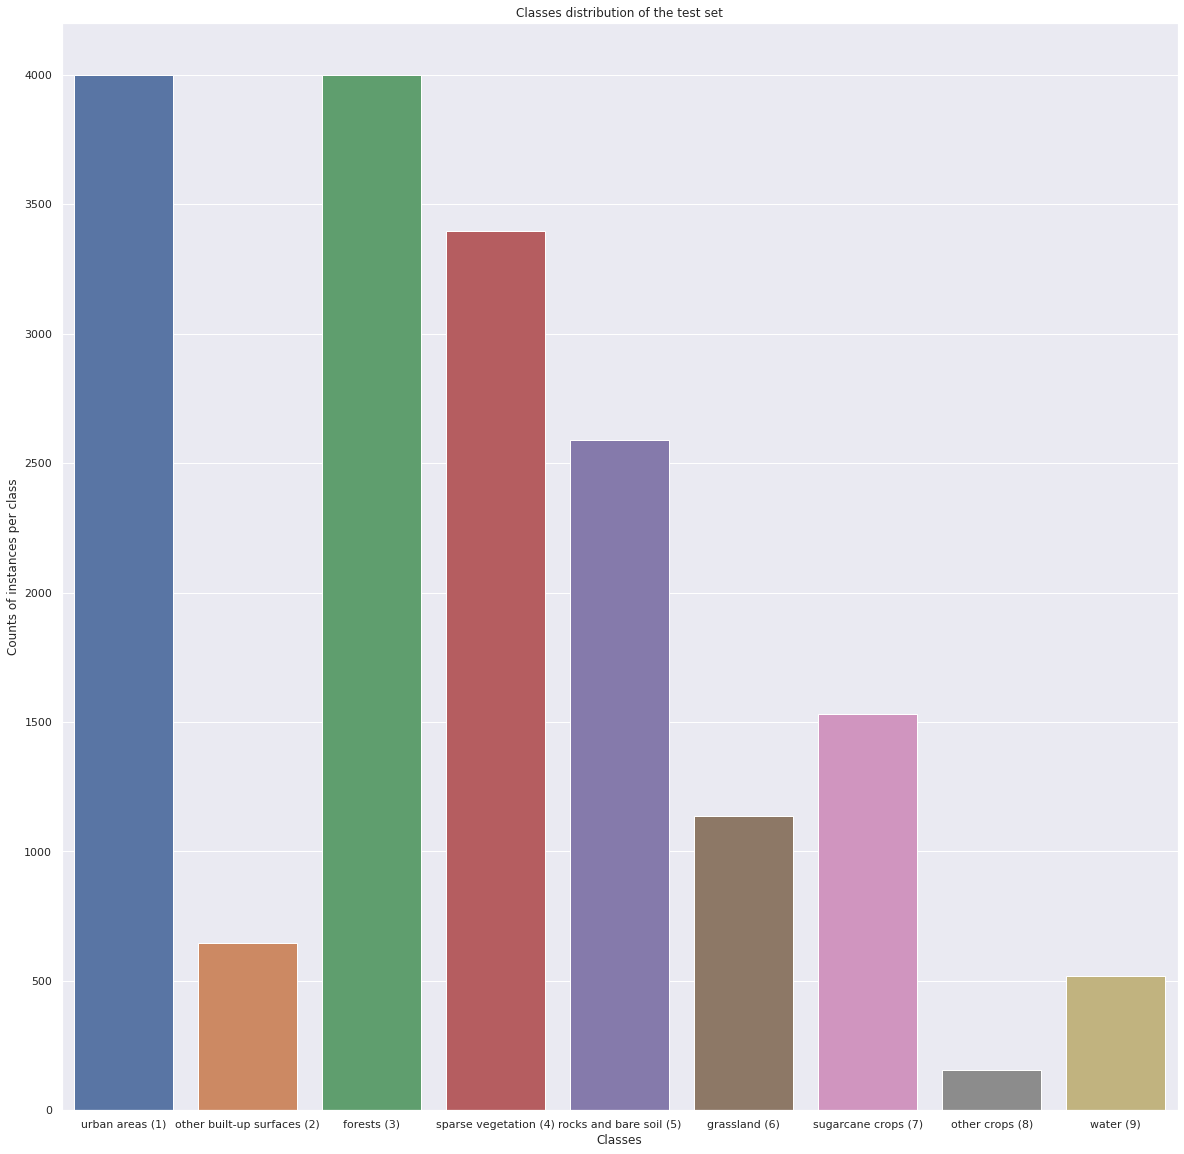

In [ ]:
val_count = classes_val_test.iloc[:,0].value_counts().sort_index()
x, y = val_count.keys(), val_count.values
plt.figure(figsize = (20,20))
ax = sns.barplot([CLASSES[i] + f" ({i+1})" for i in range(len(CLASSES))], y)
ax.set_title("Classes distribution of the test set")
ax.set_ylabel("Counts of instances per class")
ax.set_xlabel("Classes")
plt.show()

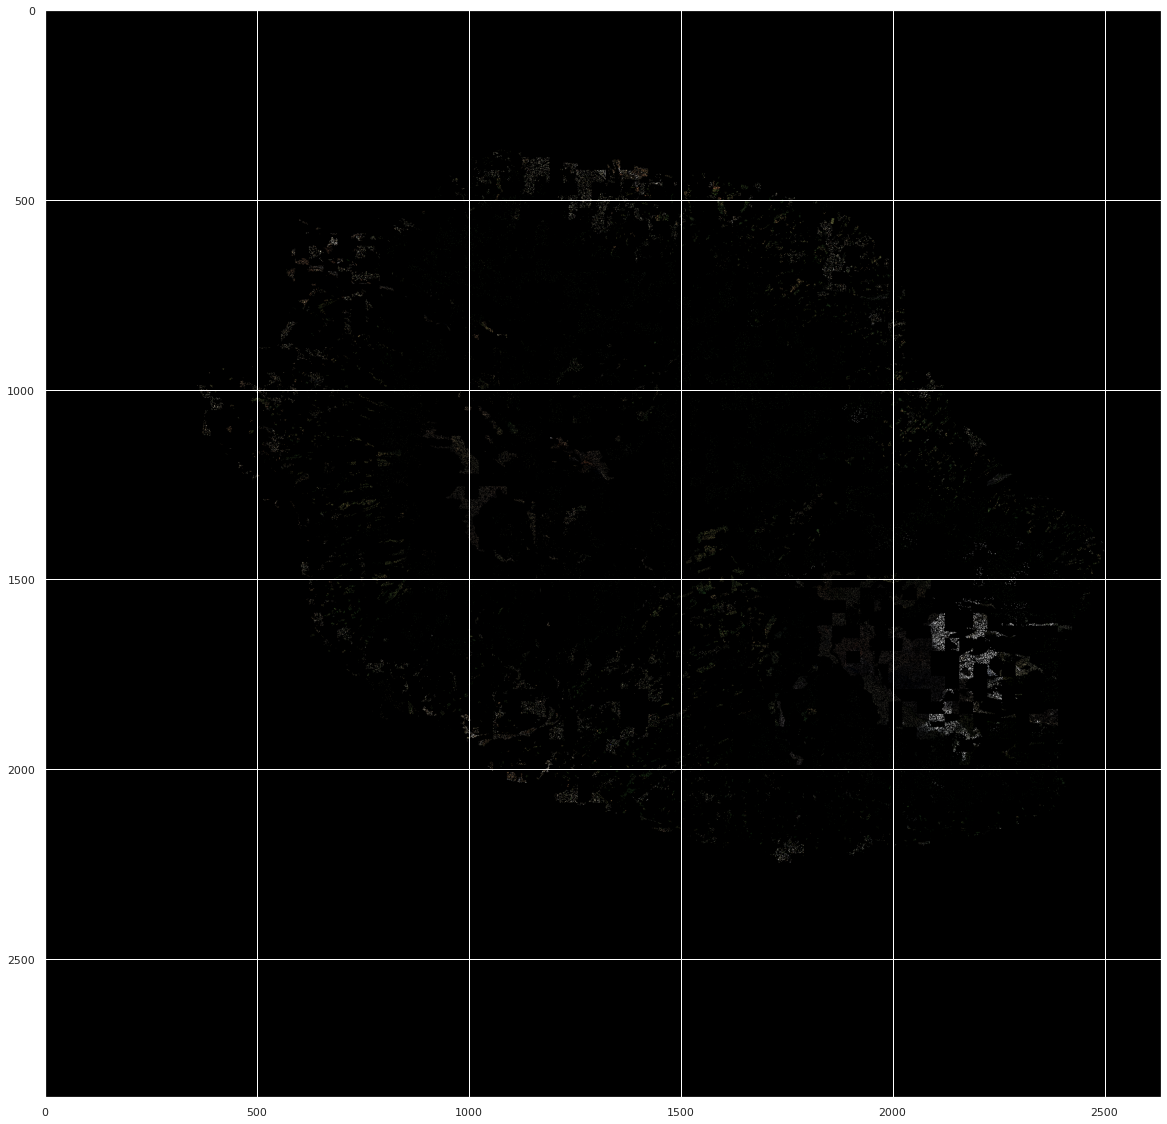

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(img[13], aspect='auto')

In [ ]:
# creating the gif
import imageio

# Write some Text

font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (1050,2600)
fontScale              = 5
fontColor              = (255,255,255)
lineType               = 4
thickness              = 10

scale_percent = 65 # percent of original size
width = int(img[0].shape[1] * scale_percent / 100)
height = int(img[0].shape[0] * scale_percent / 100)
dim = (width, height)
# resize image

with imageio.get_writer('day_animation.gif', mode='I') as writer:
    for i in range(0,NUM_OF_DAYS):
        for j in range(5):
            img_d = np.copy(img[i])
            cv2.putText(img_d,f'Day {i+1}', 
                bottomLeftCornerOfText, 
                font, 
                fontScale,
                fontColor,
                thickness,
                lineType)
            resized = cv2.resize(img_d, dim, interpolation = cv2.INTER_NEAREST) 
            writer.append_data(resized)

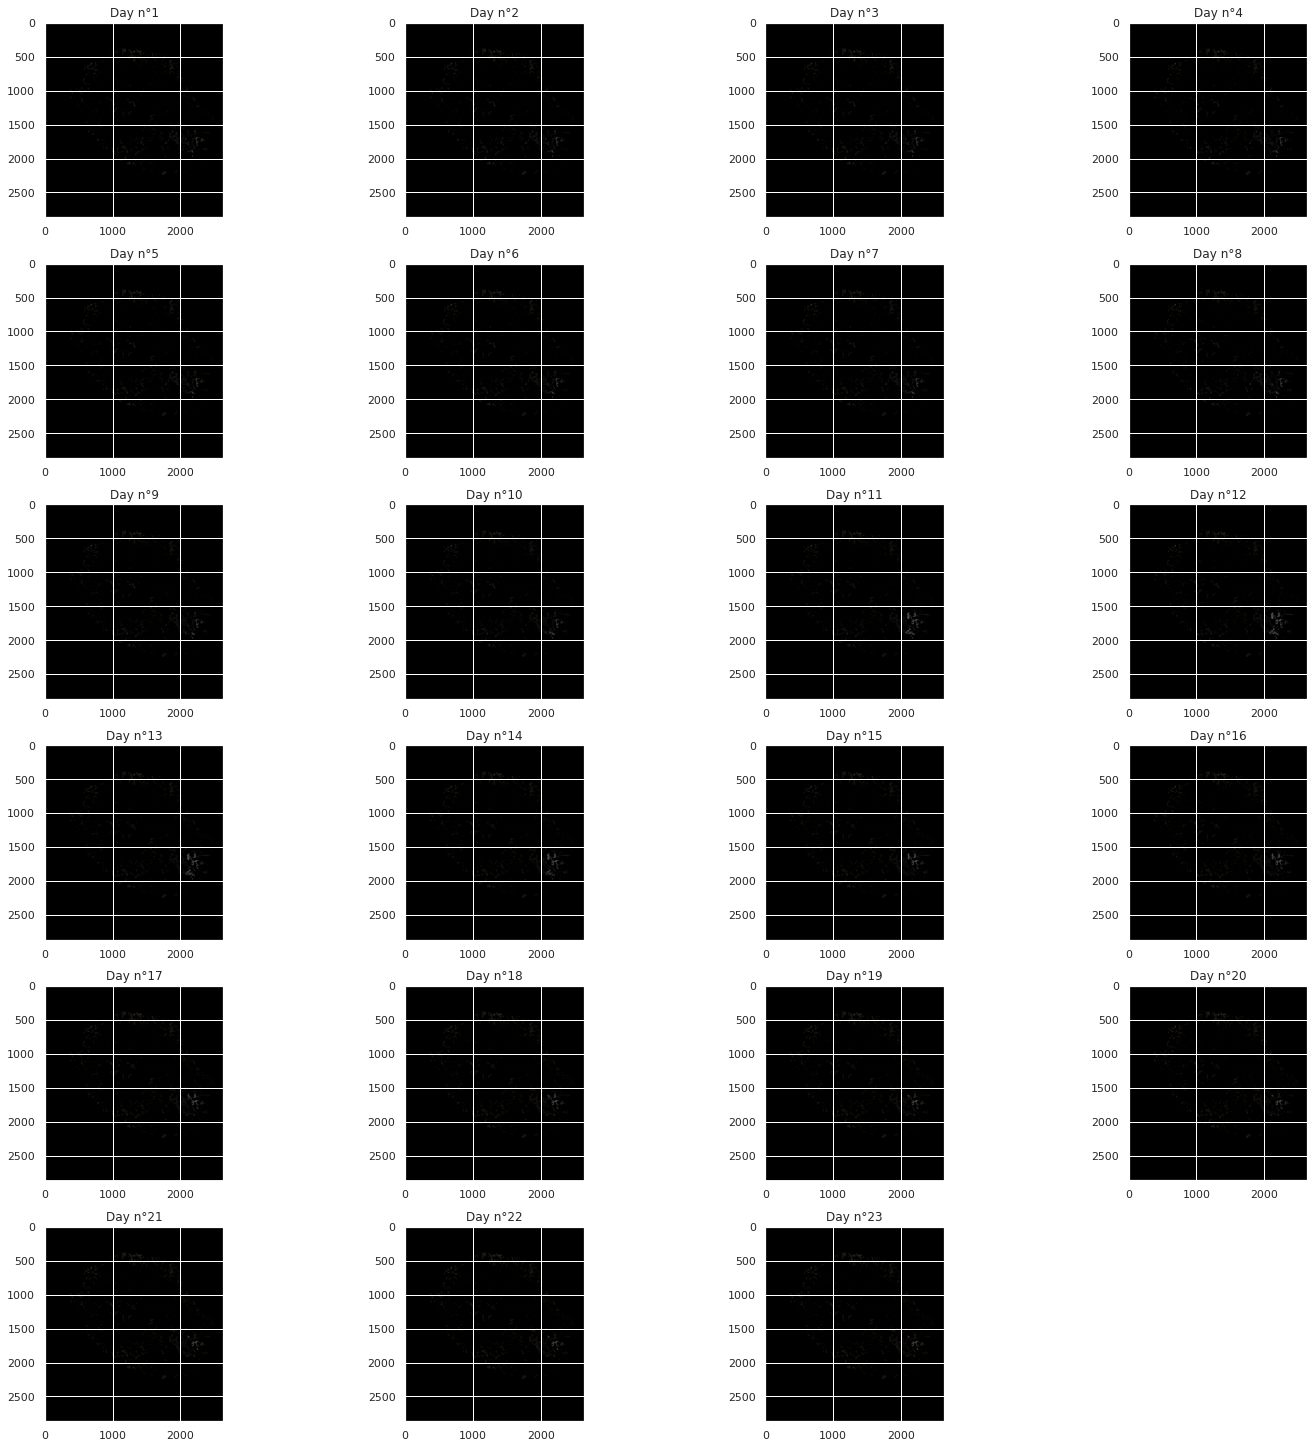

In [ ]:
fig, axs=plt.subplots(6, 4, figsize=(20, 20), constrained_layout=True)

for i in range(0,NUM_OF_DAYS):
    
    x = int(i / 4)
    y = i % 4
    
    axs[x, y].imshow(img[i])
    
    axs[x,y].set_title(f'Day n°{i+1}')

fig.delaxes(axs[5,3])
#fig.tight_layout()

Giving insights on mean value of the 10 features over the 23 days, discriminated by class
In order to have an overview of every class raster, we can create a plot for each class by computing the respective mean and standard deviation evolution value of each feature over the 23 total days. This results in one plot per class, with 10 lines on each plot. We wish to see if we can extract any pattern ourselves

In [ ]:

list_of_per_class_features_mean = [
    np.zeros((10,23)) for _ in range(len(CLASSES))
]

list_of_per_class_features_std = [
    np.zeros((10,23)) for _ in range(len(CLASSES))
]

N = data.shape[0]

def row_to_class(row):
    
    idx = row.name
    
    class_val = int(classes_val.iloc[idx, 0])
    
    # designates the feature
    for i in range(10):
        # designates the day
        for j in range(23):
            
            list_of_per_class_features_mean[class_val-1][i,j] += row[j*10 + i] # calculating the mean value
            
            list_of_per_class_features_std[class_val-1][i,j] += row[j*10 + i]*row[j*10 + i]/N
    
data.progress_apply(row_to_class, axis=1)
print("Calculation over..")

100%|██████████| 81714/81714 [05:22<00:00, 253.23it/s]

Calculation over..


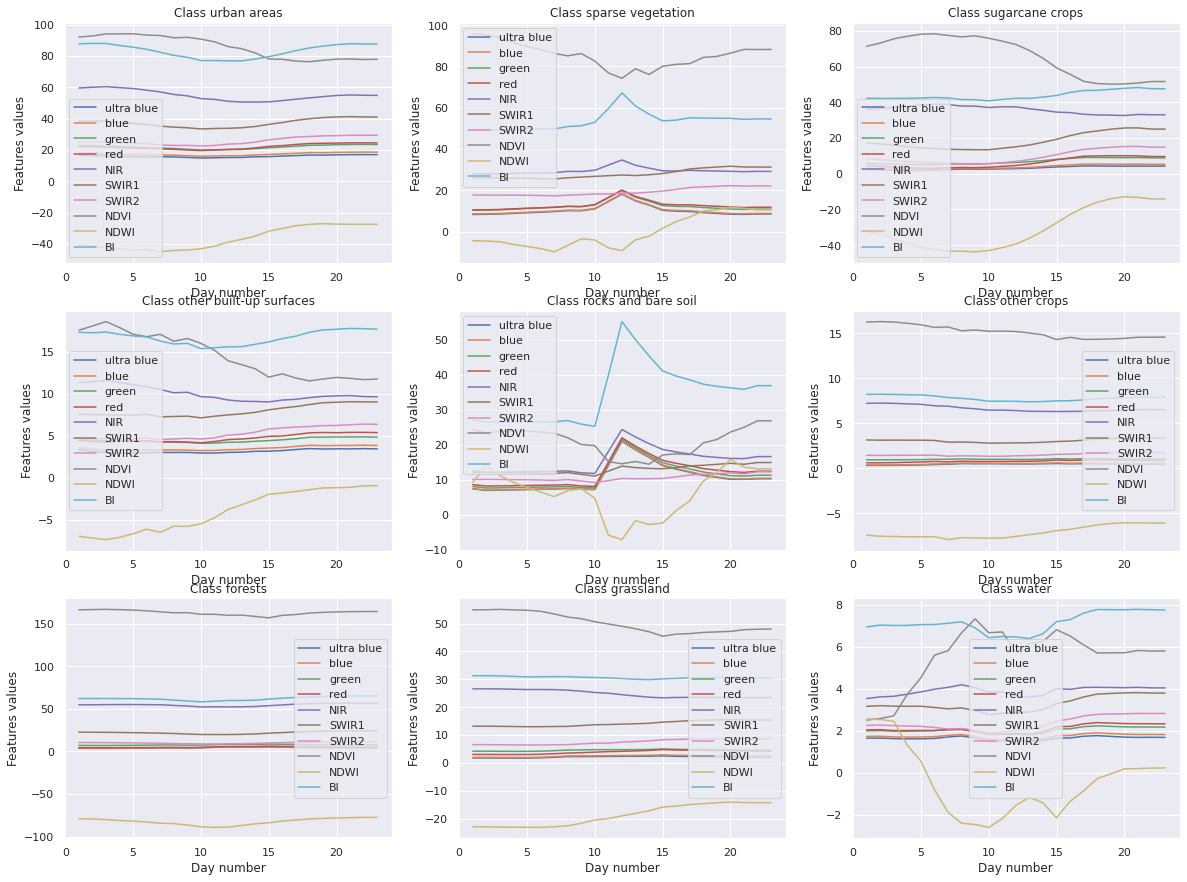

In [ ]:
fig, axs = plt.subplots(3,3, figsize=(20,15))

for idx in range(len(list_of_per_class_features_mean)):
    
    i, j = idx % 3, int(idx / 3)
    
    values = list_of_per_class_features_mean[idx]/N
    
    standard_devs = list_of_per_class_features_std[idx] - np.square(values)
    
    for idx_f, feature in enumerate(FEATURES):
        
        x = np.arange(1,24)
        y = values[idx_f, :]
        
        e = np.sqrt(standard_devs[idx_f, :])
        
        axs[i, j].errorbar(x, y, label=feature)
        

    axs[i, j].set_title(f"Class {CLASSES[idx]}")
    axs[i, j].set_ylabel("Features values")
    axs[i, j].set_xlabel("Day number")
    axs[i, j].legend()

In [ ]:
##  Keras imports
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Concatenate, Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Flatten

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau 

## Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

LR = 0.001
BATCH_SIZE = 256
EPOCHS = 50
VAL_SIZE = 0.1

In [ ]:
from tensorflow.keras.layers import Conv1D, Input, Concatenate, GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.models import Model

LR = 0.01
BATCH_SIZE = 256
EPOCHS = 100
VAL_SIZE = 0.2
DOWN_SAMPLING_FACTOR = 3
DOWN_SAMPLING_SIZE = int(np.ceil(NUM_OF_DAYS)/DOWN_SAMPLING_FACTOR) + 1
SMOOTH_SIZE = 4

scaler = StandardScaler()

In [ ]:
# Formatting the X data
data_train = data.to_numpy()
X = data_train.reshape((NUM_OF_PIXELS, 23, NUM_OF_FEATURES)).astype(np.int64)
coord_np = coord.to_numpy().astype(np.int32).reshape(-1, 2)
idx = np.arange(X.shape[0])

# Formatting the y data
classes_train = classes_val.to_numpy().astype(np.uint8)
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y = enc.fit_transform(classes_train).astype(np.uint8)

In [ ]:
# Splitting x and y into training and validation sets
X_train, X_val, y_train, y_val, idx_train, idx_val = train_test_split(X, y, idx, test_size = VAL_SIZE)

In [ ]:
coord_train = coord_np[idx_train]
coord_train = scaler.fit_transform(coord_train)

coord_val = scaler.transform(coord_np[idx_val])

b) MCNN

In [ ]:
from tensorflow.keras.layers import Flatten, AveragePooling1D

In [ ]:
def get_channel_model(ts_length):

    input_seq = Input(shape=(ts_length,1))

    x = Conv1D(12, 12, padding="same", activation="relu")(input_seq)
    x = MaxPooling1D()(x)
    x = Conv1D(24, 8, padding='same', activation="relu")(x)
    x = MaxPooling1D()(x)
    model = Model(inputs=input_seq, outputs=x)
    
    return model

def get_MCDCNN():
    
    input_models = [get_channel_model(23) for i in range(10)]
    
    merged = Concatenate(axis=1)([channel.input for channel in input_models])#concatenate all the outputs
    x = Flatten()(merged)
    x = Dense(732, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation="relu")(x)
    x = Dense(NUM_OF_CLASSES, activation="softmax")(x)
    
    mcdcnn_model = Model([channel.input for channel in input_models], x)
    return mcdcnn_model

In [ ]:
LR = 0.01
opt = SGD(LR, decay=0.0005)

mcdcnn_model = get_MCDCNN()
mcdcnn_model.compile(opt, loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
def data_generator_mcdcnn(X, y, input_shape=(10,23,1), batch_size=64):
    
    while True:
        
        for i in range(0, len(X), batch_size):
            
            upper = min(i+batch_size, len(X)-1)
            
            batch = np.copy(X[i:upper])

            batch = batch.reshape((batch.shape[0],)+input_shape)
            
            y_batch = y[i:upper]
                
            yield [batch[:,i,:,:] for i in range(10)], y_batch
            

In [ ]:
model_filename = "tiselac-mcdcnn-{epoch:02d}-{val_loss:.2f}.h5"

callbacks = [
    ModelCheckpoint(
        os.path.join("models/", model_filename),
        monitor='val_loss', verbose=1, save_best_only=True, save_freq='epoch'),
    EarlyStopping(monitor='val_loss', min_delta = 1e-4, patience = 5),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1,
                              patience=3, min_lr=0.00001)

]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = VAL_SIZE)

In [ ]:
BATCH_SIZE = 256
EPOCHS = 120

train_gen = data_generator_mcdcnn(X_train, y_train, batch_size=BATCH_SIZE)
val_gen = data_generator_mcdcnn(X_val, y_val, batch_size=BATCH_SIZE)
train_steps = round(len(X_train) / BATCH_SIZE) + 1
val_steps = round(len(X_val) / BATCH_SIZE) + 1

mcdcnn_model.fit_generator(
    train_gen,
    steps_per_epoch=train_steps,
    epochs=EPOCHS,
    validation_data=val_gen,
    validation_steps=val_steps,
    callbacks=callbacks
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/120
255/256 [============================>.] - ETA: 0s - loss: 1.1109 - accuracy: 0.6526
Epoch 00001: val_loss improved from inf to 0.80844, saving model to models/tiselac-mcdcnn-01-0.81.h5
256/256 [==============================] - 7s 23ms/step - loss: 1.1106 - accuracy: 0.6527 - val_loss: 0.8084 - val_accuracy: 0.7511 - lr: 0.0100
Epoch 2/120
255/256 [============================>.] - ETA: 0s - loss: 0.8179 - accuracy: 0.7457
Epoch 00002: val_loss improved from 0.80844 to 0.75808, saving model to models/tiselac-mcdcnn-02-0.76.h5
256/256 [==============================] - 6s 22ms/step - loss: 0.8177 - accuracy: 0.7457 - val_loss: 0.7581 - val_accuracy: 0.7556 - lr: 0.0100
Epoch 3/120
254/256 [============================>.] - ETA: 0s - loss: 0.7499 - accuracy: 0.7649
Epoch 00003: val_loss improved from 0.75808 to 0.72533, saving model to models/tiselac-mcdcnn-03-0.73.h5
256/256 [==============================] - 6s 22ms/step - loss: 0.7500 - accuracy: 0.7649 - val_loss: 0.7253

In [ ]:
from sklearn.metrics import f1_score

data_test_np = data_test.to_numpy()

X_test = data_test_np.reshape((data_test_np.shape[0], 23, NUM_OF_FEATURES)).astype(np.float32)

test_gen = data_generator_mcdcnn(X_test, y_test, batch_size=BATCH_SIZE)
test_steps = round(len(X_test) / BATCH_SIZE) + 1

In [ ]:
y_pred = mcdcnn_model.predict_generator(test_gen, steps=test_steps)
y_pred = np.argmax(y_pred, axis=1) +1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
test_gen = data_generator_mcdcnn(X_test, y_test, batch_size=BATCH_SIZE)

In [ ]:
f1_score(y_test.flatten()[:-1], y_pred[:17972], average="weighted")

0.8664966640316962